In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import style

# Data visualization


Below, the computational code used in the contest "Data visualization challenge" conducted by National Polytechnic School in Ecuador is presented. This visualization was awarded third place in the contest.




## First step


The first step in our data visualization was to get familiar with the data, a file called "muchosdatos.dat", and read it. The particular data structure was a comma-separated values with 8 columns and 999841 rows, which were read with pandas.

The data come from an astroparticle simulation. The number in the first column represent a specific particle:

1 = fotones

2 = positrón

3 = electrón

5 = muón +

6 = muón –

The next columns carry the following information:

Column 2: Linear momentum on x en GeV/c

Column 3 : Linear momentum on y en GeV/c

Column 4 : Linear momentum on en GeV/c

Column 5 : Distance on x axis (Rx)

Column 6 : Distance on y axis (Ry)

Column 7 : Fligh time in nanoseconds

Column 8 : Total energy in GeV

In [2]:
#datos = pd.read_csv('muchosdatos.dat',delimiter='\t')
df = pd.read_csv('muchosdatos.dat', sep='\s+', header=None)

In [3]:
df.columns = ['particula','momentox','momentoy','momentoz', 'distanciax', 'distanciay', 'tiempo', 'energia']
df.head()

,particula,momentox,momentoy,momentoz,distanciax,distanciay,tiempo,energia
0,1,0.000427,-0.000777,0.001780,46329.0,-258035.0,396868.0,0.002053
1,1,0.000081,-0.000084,0.000277,49384.3,-250274.0,396806.0,0.000593
2,1,-0.000237,-0.001331,0.002027,40322.3,-259922.0,396933.0,0.002489
3,1,0.000060,-0.000242,0.000299,48366.9,-255216.0,396876.0,0.000642
4,3,0.011377,-0.009270,0.046484,48410.8,-250084.0,396798.0,0.048748


## Second step

For the second step, we add a column based on the dataframe first column. In the new column we associated each number of the firts column with its corresponding particle name.

In [5]:
newdf = df[df["particula"] < 8]

lista = ["Fotón", "Positrón", "Electrón", "None" , "Muón+", "Muón-", "None", "None", "None" ]
#print(lista[1])

labeldf = df['particula'] 
#print("xd")
#print(labeldf)
labeldf = labeldf.values.tolist()
#print(labeldf)


In [6]:
labellist = []
for item in labeldf:
    for i in range(9):
        if (item == i+1):
            labellist.append(lista[i])
#print(labellist)
            

In [7]:
df1 = pd.DataFrame({"nombres" : labellist})

In [9]:
completedf = pd.merge(left=df, right=df1,
                                  left_index=True, right_index=True)
completedf.head()

,particula,momentox,momentoy,momentoz,distanciax,distanciay,tiempo,energia,nombres
0,1,0.000427,-0.000777,0.001780,46329.0,-258035.0,396868.0,0.002053,Fotón
1,1,0.000081,-0.000084,0.000277,49384.3,-250274.0,396806.0,0.000593,Fotón
2,1,-0.000237,-0.001331,0.002027,40322.3,-259922.0,396933.0,0.002489,Fotón
3,1,0.000060,-0.000242,0.000299,48366.9,-255216.0,396876.0,0.000642,Fotón
4,3,0.011377,-0.009270,0.046484,48410.8,-250084.0,396798.0,0.048748,Electrón


In [10]:
newdf = completedf[completedf["particula"] < 8]

newdf.head()


,particula,momentox,momentoy,momentoz,distanciax,distanciay,tiempo,energia,nombres
0,1,0.000427,-0.000777,0.001780,46329.0,-258035.0,396868.0,0.002053,Fotón
1,1,0.000081,-0.000084,0.000277,49384.3,-250274.0,396806.0,0.000593,Fotón
2,1,-0.000237,-0.001331,0.002027,40322.3,-259922.0,396933.0,0.002489,Fotón
3,1,0.000060,-0.000242,0.000299,48366.9,-255216.0,396876.0,0.000642,Fotón
4,3,0.011377,-0.009270,0.046484,48410.8,-250084.0,396798.0,0.048748,Electrón


## Third Step

For the thirhd step, we resize the data to prevent big numbers.

In [12]:
newdf['tiempo'] = newdf['tiempo'] * 10**(-6)
newdf['distanciax'] = newdf['distanciax'] * 10**(-5)
newdf['distanciay'] = newdf['distanciay'] * 10**(-5)
newdf.head()

<ipython-input-12-82c4ac4277a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['tiempo'] = newdf['tiempo'] * 10**(-6)
<ipython-input-12-82c4ac4277a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['distanciax'] = newdf['distanciax'] * 10**(-5)
<ipython-input-12-82c4ac4277a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

,particula,momentox,momentoy,momentoz,distanciax,distanciay,tiempo,energia,nombres
0,1,0.000427,-0.000777,0.001780,0.463290,-2.58035,0.396868,0.002053,Fotón
1,1,0.000081,-0.000084,0.000277,0.493843,-2.50274,0.396806,0.000593,Fotón
2,1,-0.000237,-0.001331,0.002027,0.403223,-2.59922,0.396933,0.002489,Fotón
3,1,0.000060,-0.000242,0.000299,0.483669,-2.55216,0.396876,0.000642,Fotón
4,3,0.011377,-0.009270,0.046484,0.484108,-2.50084,0.396798,0.048748,Electrón


In [13]:
newdf['energia'] = newdf['energia'] * 10**(-5)

<ipython-input-13-fd55daeccec7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['energia'] = newdf['energia'] * 10**(-5)


In [14]:
newdf.sort_values(by=['particula'])

,particula,momentox,momentoy,momentoz,distanciax,distanciay,tiempo,energia,nombres
0,1,0.000427,-0.000777,0.001780,0.463290,-2.580350,0.396868,2.053355e-08,Fotón
629575,1,-0.102053,0.050585,0.094969,0.052761,-3.594610,0.610336,1.483001e-06,Fotón
629576,1,-0.001644,0.000596,0.001440,-0.024009,-3.673650,0.610437,2.322010e-08,Fotón
629577,1,-0.011375,0.004736,0.010350,-0.005656,-3.654540,0.610411,1.609987e-07,Fotón
629578,1,-0.001839,0.000679,0.001847,0.030971,-3.652200,0.610328,2.741052e-08,Fotón
...,...,...,...,...,...,...,...,...,...
909875,6,0.584311,-0.148589,0.714482,1.064840,0.587599,0.475867,9.408221e-06,Muón-
909874,6,1.277790,-0.379645,1.892320,-1.019270,0.604101,0.471802,2.317092e-05,Muón-
909873,6,0.098832,-0.123952,0.288749,-3.158880,-1.062790,0.470311,3.459357e-06,Muón-
206737,6,0.678686,0.366350,1.488500,-0.246328,-1.211050,0.426977,1.679769e-05,Muón-


In [15]:

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

## Fourth step

For the fourth step, we delimited the x-axis and y-axis length, because the extension of both axis does not allow to visualize data correctly.The new axis limits involve the 99.38% of all the data.

In [17]:
testframe = newdf
testframe = testframe[testframe["distanciay"] > -20]
testframe = testframe[testframe["distanciax"] < 20]
testframe = testframe[testframe["distanciay"] < 20]
testframe = testframe[testframe["distanciax"] > -20]
testframe.head()

,particula,momentox,momentoy,momentoz,distanciax,distanciay,tiempo,energia,nombres
0,1,0.000427,-0.000777,0.001780,0.463290,-2.58035,0.396868,2.053355e-08,Fotón
1,1,0.000081,-0.000084,0.000277,0.493843,-2.50274,0.396806,5.929755e-09,Fotón
2,1,-0.000237,-0.001331,0.002027,0.403223,-2.59922,0.396933,2.489490e-08,Fotón
3,1,0.000060,-0.000242,0.000299,0.483669,-2.55216,0.396876,6.422921e-09,Fotón
4,3,0.011377,-0.009270,0.046484,0.484108,-2.50084,0.396798,4.874810e-07,Electrón


In [18]:
print(testframe['particula'].count()/newdf['particula'].count())

0.9938340196091179


In [19]:
import matplotlib.patches as mpatches

In [20]:
testframe['distanciay'].max()


19.9947

## Final Step


Finally we plot the data with matplotlib.

([], [])

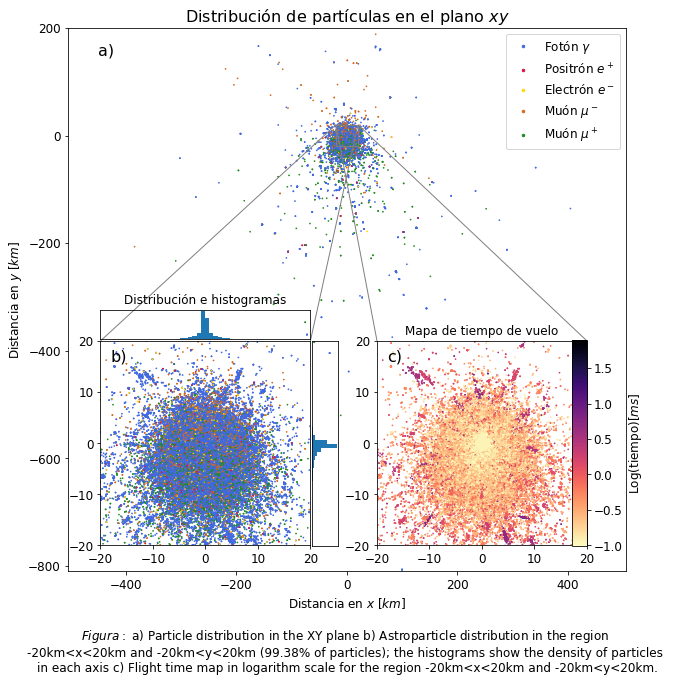

In [23]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap



################  COLOR PALETTE
viridis = cm.get_cmap('viridis', 512)

newcolors = viridis(np.linspace(0, 1, 512))
newcolors1 = viridis(np.linspace(0, 1, 512))


bottom = cm.get_cmap('nipy_spectral_r', 128)
bottom1 = cm.get_cmap('nipy_spectral', 128)

newcolors1 = np.vstack(( bottom(np.linspace(0.025, 0.5, 384)),
                        bottom(np.linspace(0.8675,1, 128)))) ## 0.975
newcolors = np.vstack(( bottom1(np.linspace(0.025, 0.1325, 128)),  
                       bottom1(np.linspace(0.5, 0.975, 384)))) ##0.76: 0.975
        
andy_r = ListedColormap(newcolors, name='andy2_r')
andy = ListedColormap(newcolors1, name='andy2')
#######################



SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

#plt.rc('font', weight = 'bold')
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize


font = {'size'   : 14}

font1 = {'size'   : 16}



#plt.rc('font', **font)  # pass in the font dict as kwargs

fig, (ax1) = plt.subplots(ncols=1, figsize=[10, 10])

#fig.subplots_adjust(left=-0.01, bottom=-0.01)

colors = { "Fotón" :'royalblue', 'Positrón':'crimson',
          'Electrón':'gold', 'Muón-':'chocolate', 'Muón+': 'forestgreen'}

colors1 = {"Fotón" : "Fotón $\gamma$", "Positrón" : "Positrón $e^+$",
           "Electrón" : "Electrón $e^-$", "Muón-" : "Muón $\mu^-$","Muón+" : "Muón $\mu^+$"}

ax1.scatter(newdf['distanciax'], newdf['distanciay'],
            c=newdf['nombres'].apply(lambda x: colors[x]), s = 0.5)
plt.ylim(-810, 200)
plt.xlim(-505, 505)
plt.title('Distribución de partículas en el plano $xy$', font1)




def colorear(color, name):
    etiqueta = mlines.Line2D([], [],linewidth=0, color= color, marker='.',
                          markersize=5, label=name,)
    return etiqueta

lista = []
for color in colors:
    etiqueta = colorear(colors[color], colors1[color])
    lista.append(etiqueta)
txt="I need the caption to be present a little below X-axis"

ax1.legend(handles=lista, loc = 'upper right')
ax1.set_ylabel('Distancia en $y$ [$km$]')
ax1.set_xlabel('''Distancia en $x$ [$km$]

$Figura:$ a) Particle distribution in the XY plane b) Astroparticle distribution in the region  
-20km<x<20km and -20km<y<20km (99.38% of particles); the histograms show the density of particles 
in each axis c) Flight time map in logarithm scale for the region -20km<x<20km and -20km<y<20km.''')


axins = zoomed_inset_axes(ax1, 9.5, loc='lower left', bbox_to_anchor=(86.5,80), borderpad=3)
axins2 = zoomed_inset_axes(ax1, 9.5, loc='lower right', bbox_to_anchor=(645,80), borderpad=3)


################# etiquetas 
ax1.text(-450, 150, 'a)', font1) 
axins.text(-18, 16, 'b)', font1)
axins2.text(-18, 16, 'c)', font1)
################3



mark_inset(ax1, axins,loc1=2, loc2=1 , fc="none", ec="0.5")
mark_inset(ax1, axins2,loc1=2, loc2=1 , fc="none", ec="0.5")

x1, x2, y1, y2 = -20, 20, -20, 20
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

axins.yaxis.get_major_locator().set_params(nbins=7)
axins.xaxis.get_major_locator().set_params(nbins=7)

plt.setp(axins.get_xticklabels(), visible=True)
plt.setp(axins.get_yticklabels(), visible=True)

##################
axins2.set_xlim(x1, x2)
axins2.set_ylim(y1, y2)

axins2.yaxis.get_major_locator().set_params(nbins=7)
axins2.xaxis.get_major_locator().set_params(nbins=7)

plt.setp(axins2.get_xticklabels(), visible=True)
plt.setp(axins2.get_yticklabels(), visible=True)
############3


axins.scatter(newdf['distanciax'], newdf['distanciay'],
            c=newdf['nombres'].apply(lambda x: colors[x]), s = 0.5)

cf = axins2.scatter(newdf['distanciax'], newdf['distanciay'], 
               c=np.log(newdf['tiempo']), s = 0.5, cmap='magma_r')
plt.title('Mapa de tiempo de vuelo')
cax = plt.axes([0.8255, 0.161, .02, .285])
fig.colorbar(cf, cax = cax, label = 'Log(tiempo)[$ms$]')

###########################

a = plt.axes([0.169, 0.448, .292, .04])
plt.hist(testframe['distanciax'], density= 1, bins = 50)
plt.title('Distribución e histogramas')
a.patch.set_facecolor('white') 
a.patch.set_alpha(0)
plt.xlim(-20, 20)
plt.xticks([])
plt.yticks([])

b = plt.axes([0.464, 0.16, .03675, .285])
plt.hist(testframe['distanciay'], density= 1, bins = 50, orientation=u'horizontal', stacked=True)
b.patch.set_facecolor('white') 
b.patch.set_alpha(0)
plt.ylim(-20, 20)
plt.xticks([])
plt.yticks([])

#fig.subplots_adjust( bottom=-0.01)

#plt.savefig('concurso16.jpg')
#plt.show()